In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict, defaultdict
import json  

In [2]:
tickers = sorted([ticker[9:-4] for ticker in glob.glob("data/raw/*.zip")])
daily_returns = pd.DataFrame(index=pd.date_range(start="1999-01-05", end="2021-03-01", 
                                                 freq=pd.tseries.offsets.BDay(), name="Date"))  # business dates
for ticker in tickers:
    df = pd.read_pickle("data/raw/" + ticker + ".zip")  # needs pickle5 compression (python 3.8)
    daily_returns[ticker] = df["Log Return"].fillna(method='ffill')

daily_returns

,AA,AAIC,AAME,AAON,AAPL,AB,ABC,ABCB,ABEO,ABEV,...,Y,YPF,YUM,YVR,ZBRA,ZEUS,ZION,ZIXI,ZNH,ZTR
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,0.022606,-0.066375,0.084558,0.012579,0.048790,-0.002430,-0.014945,0.000000,0.000000,0.000000,...,-0.001340,0.000000,0.019293,0.051293,0.016878,0.071459,-0.003114,0.006390,0.024693,0.007017
1999-01-06,0.039139,0.000000,-0.055570,0.000000,-0.036742,0.009685,0.005300,0.019609,0.000000,0.000000,...,-0.024424,0.094139,0.015171,0.000000,0.002090,0.139261,0.001039,-0.019293,0.125880,0.007863
1999-01-07,-0.012877,0.038466,0.000000,-0.012579,0.074963,-0.017012,0.042266,-0.009757,-0.054067,0.000000,...,0.017700,-0.001955,-0.005032,0.182322,0.022705,-0.030459,-0.007296,0.087011,-0.101783,-0.014084
1999-01-08,0.097711,-0.038466,0.028171,0.000000,0.000000,0.000000,-0.034368,0.014599,0.105361,0.014600,...,0.013405,-0.019764,0.002518,-0.087011,0.104544,0.030459,0.002090,0.046520,-0.036368,-0.007118
1999-01-11,0.035108,-0.009853,0.000000,0.012579,0.019256,-0.012330,0.025886,0.004819,0.139762,-0.027499,...,-0.012056,-0.010030,0.026073,0.000000,-0.045120,-0.010050,-0.027515,0.033523,0.024391,0.014185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,0.004024,-0.012579,-0.117531,0.010862,-0.001112,-0.017258,0.003293,0.014985,-0.060064,0.021979,...,0.009791,-0.002436,-0.003434,-0.052644,0.019690,0.028095,0.015066,-0.026344,0.141055,0.001112
2021-02-24,0.088349,0.039707,0.026847,0.013574,-0.004060,0.010445,-0.012000,0.023360,0.046520,-0.010929,...,0.040534,0.084162,0.000287,0.016086,0.029031,0.020565,0.047057,-0.015520,-0.029158,0.002220
2021-02-25,-0.062188,-0.034657,0.021835,-0.016181,-0.035402,-0.002738,-0.022592,-0.043114,0.123825,-0.041127,...,-0.005629,-0.041196,0.000191,-0.054658,-0.029835,-0.033434,-0.039700,-0.035017,-0.058117,-0.011148


In [34]:
# creates copy of daily_returns which is sorted by sector

sector_path = r'data/info/tickers.txt'

sectors = pd.read_csv(sector_path, delimiter = ",")

s = list(sectors.sort_values(by='Sector', axis=0)['Symbol'])
# sectors

In [72]:
s1 = sectors.sort_values(by='Sector', axis=0)
s2 = s1[s1.Sector != 'Technology']
s2 = list(s2['Symbol'])
# s1['Sector'].unique()
# s2

In [74]:
s = [x for x in s if x in list(daily_returns.columns)]
s2 = [x for x in s2 if x in list(daily_returns.columns)]
# s

In [82]:
sectors.groupby('Sector').count()['Symbol']

Sector
Basic Industries          327
Capital Goods             424
Consumer Durables         153
Consumer Non-Durables     223
Consumer Services         846
Energy                    241
Finance                  1645
Health Care              1096
Miscellaneous             172
Public Utilities          244
Technology                708
Transportation            113
Name: Symbol, dtype: int64

KeyError: (0, 0)

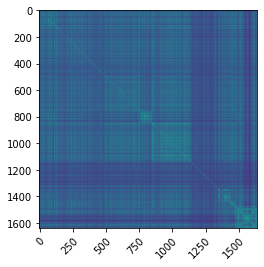

In [75]:
# GENERATES A HEATMAP OF CORRELATIONS
# but its not useful since we have 1846x1846 correlations
# just uncomment everything once to try it out

vegetables = tickers
farmers = tickers

harvest = daily_returns[s2].corr(method="pearson")

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
# ax.set_xticks(np.arange(len(farmers)))
# ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
# ax.set_xticklabels(farmers)
# ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
# fig.tight_layout()
fig.save('Heatmap By Sector ')
plt.show()

In [ ]:
corr = daily_returns.corr(method="pearson")

In [ ]:
th = 0.834 #highest threshold for 20 pairs

def add_value(pairs_dict, key, value):
    if key in pairs_dict.keys():
        pairs_dict[key] += [value]
    else:
        pairs_dict[key] = [value]

def get_top_pairs(useThreshold):
    pairs_dict = {}
    for ticker in tickers:
        top5 = corr.sort_values(by=[ticker])[ticker][-6:-1] # exclude itself
        assert top5.name == ticker

        # TOP 5 FOR EVERY TICKER
        if not useThreshold:
            pairs_dict[ticker] = top5.to_dict({})
            
        # JUST ADD THOSE ABOVE THRESHOLD
        else:
            if top5.max() > th:
                for tick in top5.index:
                    if top5[tick] > th:
                        add_value(pairs_dict, top5.name, {tick: top5[tick]})
                
    return pairs_dict


def top_n_pairs(n: int=5) -> Dict[str, Dict[str, float]]:
    pairs_dict: Dict[str, Dict[str, float]]=dict()
    for ticker in tickers:
        top_n = corr.sort_values(by=[ticker])[ticker][(-1 - n):-1] # exclude itself
        assert top_n.name == ticker
        pairs_dict[ticker] = top_n.to_dict({})
    
    return pairs_dict


In [ ]:
top_n_pairs()

In [ ]:
top5alltickers = get_top_pairs(False)
top20pairs = get_top_pairs(True)

In [ ]:
# SAVES THE JSON TO THE DESIRED PATH
top5alltickersJSON = json.dumps(top5alltickers, sort_keys=False, indent=4, separators=(',', ': '))
save_path = "data/info/corellations.json"
open(save_path,"w").write(top5alltickersJSON)
print(top5alltickersJSON)

In [ ]:
# SAVES THE JSON TO THE DESIRED PATH
top20pairsJSON = json.dumps(top20pairs, sort_keys=False, indent=4, separators=(',', ': '))
save_path = "data/info/top20corellations.json"
open(save_path,"w").write(top20pairsJSON)
print(top20pairsJSON)

In [ ]:
from typing import Dict, Tuple
def match_tickers(corr_dict: Dict[str, Dict[str, float]], min_corr=0, debug=False):
    all_tickers: Set[str] = set()
    all_pairs: Dict[Tuple[str, str], float] = dict()
    # iterate over all pairs, and add the SORTED tuple of tickers with their correlations
    # sorting ensures (A, B) and (B, A) will not both be added
    for ticker_a, ticker_a_dict in corr_dict.items():
        for ticker_b, a_b_corr in ticker_a_dict.items():
            # for ticker pairs above the minimum corr, add to the set and dict
            if min_corr <= a_b_corr:
                all_tickers.add(ticker_a); all_tickers.add(ticker_b)
                all_pairs[tuple(sorted([ticker_a, ticker_b]))] = a_b_corr
    
    # use a modified non-optimal version of Gale-Shapley to find the matchings
    unmatched: Dict[str, bool] = {ticker: True for ticker in all_tickers}
    matches: Dict[str, str] = dict()  # use dict instead of list of sets for speed
    i = 0  # terminate at 100 iterations
    while any([unmatched_i for unmatched_i in unmatched.values()]) and i < 100:
        if debug:
            num_matched = sum([1 for unmatched_i in unmatched.values() if not unmatched_i])
            print(f"Iteration: {i}, number matched: {num_matched}")
        for (ticker_a, ticker_b), a_b_corr in all_pairs.items():
            if unmatched[ticker_a] and unmatched[ticker_b]:
                unmatched[ticker_a] = False; unmatched[ticker_b] = False
                matches[ticker_a] = ticker_b; matches[ticker_b] = ticker_a
            else:
                a_pair = tuple(sorted([ticker_a, matches.get(ticker_a, "")]))
                b_pair = tuple(sorted([ticker_b, matches.get(ticker_b, "")]))
                a_corr = all_pairs.get(a_pair, 0.0)
                b_corr = all_pairs.get(b_pair, 0.0)
                # if tickers a and b are better corellated than their current matches
                if a_corr < a_b_corr and b_corr < a_b_corr:
                    if debug: 
                        print(f"pair: {(ticker_a, ticker_b)} better than {a_pair} and {b_pair}")
                    # remove the current matches (checking if they exist)
                    ticker_a_match = matches.get(ticker_a, "")
                    ticker_b_match = matches.get(ticker_b, "")
                    if ticker_a_match != "": 
                        unmatched[ticker_a_match] = True
                        del matches[ticker_a_match]
                    if ticker_b_match != "": 
                        unmatched[ticker_b_match] = True
                        del matches[ticker_b_match]
                    
                    # match ticker_a and ticker_b
                    unmatched[ticker_a] = False; unmatched[ticker_b] = False
                    matches[ticker_a] = ticker_b; matches[ticker_b] = ticker_a
        i += 1
    
    matched_pairs: Dict[Tuple[str, str], float] = {
        tuple(sorted([ticker_a, ticker_b])): all_pairs.get(tuple(sorted([ticker_a, ticker_b])))
        for (ticker_a, ticker_b) in matches.items()
    }
    return matched_pairs

In [ ]:
matched_tickers = match_tickers(top5alltickers, min_corr=0.75)
# tuple to tuple string representation for keys, save as JSON
matched_tickers_JSON = json.dumps(
    {str(k): v for k,v in matched_tickers.items()}, 
    sort_keys=False, indent=4, separators=(',', ': '))
save_path = "data/info/pairs.json"
open(save_path,"w").write(matched_tickers_JSON)
print(matched_tickers)